<a href="https://colab.research.google.com/github/ElijahJordan/ME3295/blob/master/ME3295_HW2_Relative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Init

In [ ]:
###Imports###
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#General Solution 


In [ ]:
###Variable Definitions###
G = 6.67430E-11  # m**3/(kg*s**2)
m_E = 5.974E24  # kg
r_E = 6378  # km
m_s = 1000  # kg
mu = G*(m_E+m_s)
t_0 = 0  # s
t_f = 86400  # s (24 hrs)
t_interval = np.linspace(t_0,t_f,10000)

###Initial Conditions###
Rs1_0 = np.array((3207,5459,2714))*1000  # m
Vs1_0 = np.array((-6.532,0.7835,6.142))*1000  # m/s

Rs2_0 = np.array((6600,0,0))*1000  # m
Vs2_0 = np.array((0,12,0))*1000  # m/s

###Initial State Vectors###
y1_0 = np.hstack((Rs1_0,Vs1_0))
y2_0 = np.hstack((Rs2_0,Vs2_0))

In [ ]:
###Function Definition###
def motion (t,y):
    """Function for solving the value of the state vector at a different
    time for orbital motion involving two masses in a relative frame. 
    Takes two inputs:[t:time interval],[y:arraylike, initial state vector value]
    """
    X,Y,Z = y[:3]
    r = (X**2+Y**2+Z**2)**.5
    ydot = np.zeros(6)
    ydot[:3] = y[3:]
    ydot[3:] = (-mu/r**3)*y[:3]
    return ydot

#Problem 2.24 Solution



The current maximum value is: 9604.0738 km above earth
The current time is: 1.6946 hours


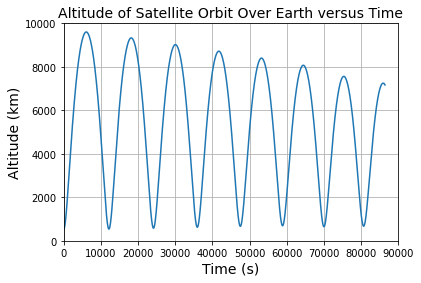

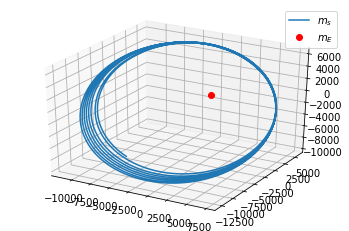

In [ ]:
###Testing Q2.4###
#Calling Solver Function#
sol1 = solve_ivp(motion,[t_0,t_f],y1_0,t_eval=t_interval)
y = sol1.y.T
R_s1 = y[:,:3]/1000  # km
V_s1 = y[:,3:]/1000  # km/s

#Finding Max Altitude#
altitude = np.zeros(10000)
max = 0
for i in range(10000): 
    altitude[i] = ((((R_s1[i,0])**2)+((R_s1[i,1])**2)+((R_s1[i,2])**2))**(.5))-r_E
    if altitude[i] > max:
        t_max=t_interval[i]/3600. #Converting to hours
        max=np.max(altitude)
        
#Plotting 2D graph of altitude over time#    
plt.plot(t_interval,altitude)
plt.grid(b='True',which='major')
plt.title('Altitude of Satellite Orbit Over Earth versus Time',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Altitude (km)',fontsize=14)
plt.xlim(0,90000)
plt.ylim(0,10000);

mE = np.zeros((1,3))
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
barrycenter = (m_s*R_s1)/(m_E+m_s)
R2_rel_G = R_s1-barrycenter
ax.plot(R2_rel_G[:,0],R2_rel_G[:,1],R2_rel_G[:,2],label="$m_s$")
ax.plot(mE[:,0],mE[:,1],mE[:,2],'ro',label="$m_E$")
ax.legend();

#Output#
print('The current maximum value is:',round(max,4),'km above earth')
print('The current time is:',round(t_max,4),'hours')

#Problem 2.25 Solution

In [ ]:
###Testing Q2.5###
#Calling Solver Function#
sol2 = solve_ivp(motion,[t_0,t_f],y2_0,t_eval=t_interval)
y = sol2.y.T
R_s2 = y[:,:3]/1000  # km
V_s2 = y[:,3:]/1000  # km/s

#Finding Radius at t=86400#
i2 = 9999 
radius = ((((R_s2[i2,0])**2)+((R_s2[i2,1])**2)+((R_s2[i2,2])**2))**(.5))
velocity = ((((V_s2[i2,0])**2)+((V_s2[i2,1])**2)+((V_s2[i2,2])**2))**(.5))

#Output#
print('The current time is:',(t_f/3600),'hours')
print('The current radius is:',round(radius,4),'km above earth')
print('The current velocity is:',round(velocity,4),'km/s')

The current time is: 24.0 hours
The current radius is: 463008.8378 km above earth
The current velocity is: 4.991 km/s
